## Data exploration

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Let's grab the data from [September, 2016](https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip)

In [10]:
data = pd.read_csv('201609-citibike-tripdata.csv')

### How does the data look?

In [11]:
data.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,975,9/1/2016 00:00:02,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
1,1220,9/1/2016 00:00:04,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
2,308,9/1/2016 00:00:19,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
3,250,9/1/2016 00:00:25,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
4,439,9/1/2016 00:00:25,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


### Looks good! How much data do we have?

In [46]:
num_rides = len(data)
num_female = len(data[data['gender'] == 2])
percent_female = (num_female / num_rides) * 100
num_male = len(data[data['gender'] == 1])
percent_male = (num_male / num_rides) * 100
print(("Our data set has %d rides, " +
      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
        len(data), percent_female, num_female, percent_male, num_male))

Our data set has 1648856 rides, of which 22.54% (371680) are female and 64.11% (1057055) are male


### What are the most popular stations?

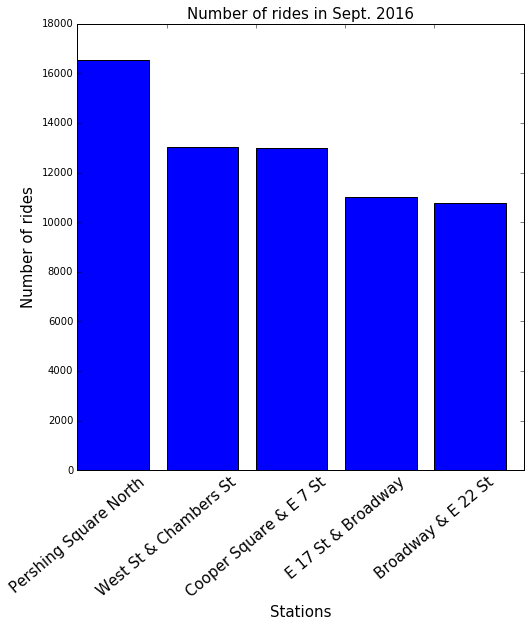

In [57]:
sorted_data = data.groupby('start station name')['start station id'].count().reset_index()
sorted_data.columns = ['Start Station', 'Count']
sorted_data = sorted_data.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.figure(figsize=(8,8))
plt.bar(list(range(len(sorted_data))), sorted_data['Count'], 
            tick_label=sorted_data['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Number of rides in Sept. 2016', fontsize = 15)
print()